# Pytorch Computer Vision
## 0. Computer vision libaries in PyTorch
* `torchvision` 
* `torchvision.datasets` 
* `torchvision.models` 
* `torchvision.transforms` 
* `torch.utils.data.Dataset`
* `torch.utils.data.DataLoader`



In [1]:
# Import PyTorch
import torch
import torch.nn as nn

# Import torchvision
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor # Convert PIL or numpy image to Tensor

# Import matplotlib
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.1.0
0.16.0


## 1. Getting a Dataset

FashinMNIST

In [2]:
# Setup training data
train_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=False,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=False,
    transform=ToTensor(),
    target_transform=None
)

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names, train_data.class_to_idx

(['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'],
 {'T-shirt/top': 0,
  'Trouser': 1,
  'Pullover': 2,
  'Dress': 3,
  'Coat': 4,
  'Sandal': 5,
  'Shirt': 6,
  'Sneaker': 7,
  'Bag': 8,
  'Ankle boot': 9})

In [6]:
# Check the shape of our image
image.shape, label
print(f'image shape[C,H,W]: {image.shape}')
print(f'label: {class_names[label]}')

image shape[C,H,W]: torch.Size([1, 28, 28])
label: Ankle boot


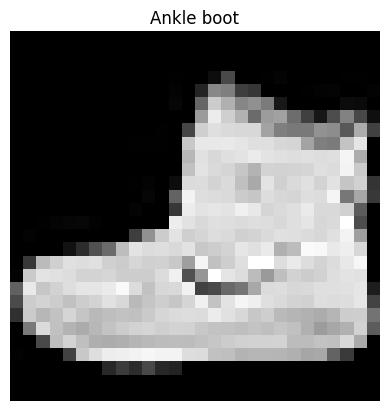

In [7]:
import matplotlib.pyplot as plt
image, label = train_data[0]
plt.title(class_names[label])
plt.axis(False)
plt.imshow(image.permute(1,2,0).squeeze(), cmap=plt.cm.gray)

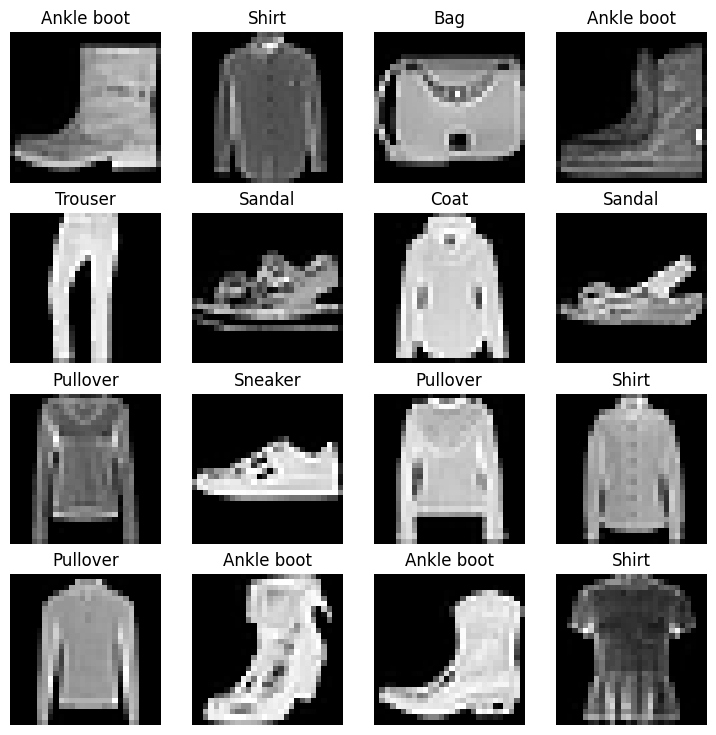

In [8]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))

rows, cols = 4, 4
for i in range(1, rows*cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    image, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False);

## 2. Prepare DataLoader

Right now, our data is in the form of PyTorch dataset.

DataLoader turns our dataset into a Python iterable.

More specifically, we want to turn our data into **batches** (or mini-batches).

Why?

1. It is more computationally efficeint as in, your computing hardward may not be able to look at 60000 images in one hit. Se we break it down to batches.
2. It gives our neural network more chances to update its gradients per epoch.

[youtube](https://youtu.be.)

In [9]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [10]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x151f82e10>,
 <torch.utils.data.dataloader.DataLoader at 0x157bfbcd0>)

In [11]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


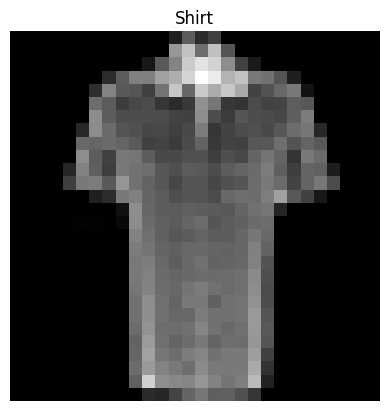

In [12]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
image, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f'Image size: {image.shape}')
print(f'Label: {label}, label size: {label.shape}')

## 3. Model 0: Build a basline model

When starting to build a series of mahicne learning modelling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

In other words: start simply and add complexity when necessary.

In [13]:
# create a fallten layer
flatten_model = nn.Flatten()

# Get a single sample.
X = train_features_batch[0]

# Flatten the sample
output = flatten_model(X)

print(f'shape before flattening: {X.shape}')
print(f'shape after flattening: {output.shape}')

shape before flattening: torch.Size([1, 28, 28])
shape after flattening: torch.Size([1, 784])


In [14]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int) -> None:
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )
    
    def forward(self, x):
        return self.layer_stack(x) 

In [15]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784, # 28 * 28
    hidden_units=10,
    output_shape = len(class_names)
).to('cpu')

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [16]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function : `nn.CrossEntropyLoss()` (multi-classification)
* Optimizer : `torch.optim.SGD()`
* Evalutaion metric : accuracy

In [17]:
import requests
import os

if not os.path.exists('helper_functions.py'):
    with open('helper_functions.py', 'wb') as f:
        r = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learing/main/helper_functions.py')
        f.write(r.content)

In [18]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### 3.2 Creating a function to time our experiments.

Machine learning is very experimental

Two of the main things you'll often want to track
1. Model's performance (loss, acc, etc)
2. How Fast it is.

In [19]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
    '''
    prints difference between start and end time.
    '''
    total_time = end - start
    print(f'Train time on {device}: {total_time:.3f} seconds')
    return total_time

In [20]:
start_time = timer()

end_time = timer()

print_train_time(start=start_time, end=end_time, device='cpu')

Train time on cpu: 0.000 seconds


8.875009370967746e-06

In [21]:
# UPTOHERE: 3.3 Creating a training loop and training a model on batches of data.
# NOTE: optim will update a model's param once per batch not once per epoch.

### 3.3 Creating a training loop and traning a model on batches of data

1. loop through epochs.
2. loop through training batches, perform training steps, calculate the train loss *per batch*
3. loop through testing batches, perform testing steps, calculate the test loss *per batch*
4. print out what's happening.
5. Time it all

In [26]:
# import tqdm for progress bar.
from tqdm.auto import tqdm

# set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# set the number of epochs
epochs = 3

# train and test loop
for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}\n-------')
    ### Training
    train_loss = 0

    model_0.train()
    for batch, (X, y) in enumerate(train_dataloader):
        logit = model_0(X)
        loss = loss_fn(logit, y)
        print(loss)
        train_loss += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 400 == 0:
            print(f'Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples')

    train_loss /= len(train_dataloader)

    ### Testing
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            test_logit = model_0(X_test)
            test_loss += loss_fn(test_logit, y_test)
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_logit.argmax(dim=1))
        
        # Calculate the test loss & test acc avg.
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    print(f'\nTrain loss: {train_loss:.4f} \t|\t Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}\n\n')

train_time_end_on_cpu = timer()

total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))
            
            



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
tensor(0.2846, grad_fn=<NllLossBackward0>)
Looked at 0/60000 samples
tensor(0.5926, grad_fn=<NllLossBackward0>)
tensor(0.4277, grad_fn=<NllLossBackward0>)
tensor(0.3943, grad_fn=<NllLossBackward0>)
tensor(0.3040, grad_fn=<NllLossBackward0>)
tensor(0.2251, grad_fn=<NllLossBackward0>)
tensor(0.3212, grad_fn=<NllLossBackward0>)
tensor(0.4481, grad_fn=<NllLossBackward0>)
tensor(0.2921, grad_fn=<NllLossBackward0>)
tensor(0.7047, grad_fn=<NllLossBackward0>)
tensor(0.4441, grad_fn=<NllLossBackward0>)
tensor(0.2999, grad_fn=<NllLossBackward0>)
tensor(0.6458, grad_fn=<NllLossBackward0>)
tensor(0.8058, grad_fn=<NllLossBackward0>)
tensor(0.4455, grad_fn=<NllLossBackward0>)
tensor(0.3206, grad_fn=<NllLossBackward0>)
tensor(0.3928, grad_fn=<NllLossBackward0>)
tensor(0.3610, grad_fn=<NllLossBackward0>)
tensor(0.5041, grad_fn=<NllLossBackward0>)
tensor(0.2774, grad_fn=<NllLossBackward0>)
tensor(0.5299, grad_fn=<NllLossBackward0>)
tensor(0.2684, grad_fn=<NllLossBackward0>)
tensor(0.43

 33%|███▎      | 1/3 [00:02<00:04,  2.41s/it]


Train loss: 0.4440 	|	 Test loss: 0.4651, Test acc: 83.6462


Epoch: 1
-------
tensor(0.3491, grad_fn=<NllLossBackward0>)
Looked at 0/60000 samples
tensor(0.2486, grad_fn=<NllLossBackward0>)
tensor(0.2078, grad_fn=<NllLossBackward0>)
tensor(0.2923, grad_fn=<NllLossBackward0>)
tensor(0.6329, grad_fn=<NllLossBackward0>)
tensor(0.6819, grad_fn=<NllLossBackward0>)
tensor(0.4362, grad_fn=<NllLossBackward0>)
tensor(0.3672, grad_fn=<NllLossBackward0>)
tensor(0.2996, grad_fn=<NllLossBackward0>)
tensor(0.4613, grad_fn=<NllLossBackward0>)
tensor(0.4587, grad_fn=<NllLossBackward0>)
tensor(0.6033, grad_fn=<NllLossBackward0>)
tensor(0.2705, grad_fn=<NllLossBackward0>)
tensor(0.5820, grad_fn=<NllLossBackward0>)
tensor(0.5650, grad_fn=<NllLossBackward0>)
tensor(0.2622, grad_fn=<NllLossBackward0>)
tensor(0.5349, grad_fn=<NllLossBackward0>)
tensor(0.4105, grad_fn=<NllLossBackward0>)
tensor(0.3608, grad_fn=<NllLossBackward0>)
tensor(0.4039, grad_fn=<NllLossBackward0>)
tensor(0.4446, grad_fn=<NllLossBac

 67%|██████▋   | 2/3 [00:04<00:02,  2.44s/it]


Train loss: 0.4366 	|	 Test loss: 0.4645, Test acc: 83.8858


Epoch: 2
-------
tensor(0.3525, grad_fn=<NllLossBackward0>)
Looked at 0/60000 samples
tensor(0.2051, grad_fn=<NllLossBackward0>)
tensor(0.5042, grad_fn=<NllLossBackward0>)
tensor(0.3040, grad_fn=<NllLossBackward0>)
tensor(0.6017, grad_fn=<NllLossBackward0>)
tensor(0.1377, grad_fn=<NllLossBackward0>)
tensor(0.3269, grad_fn=<NllLossBackward0>)
tensor(0.3890, grad_fn=<NllLossBackward0>)
tensor(0.4389, grad_fn=<NllLossBackward0>)
tensor(0.7500, grad_fn=<NllLossBackward0>)
tensor(0.2664, grad_fn=<NllLossBackward0>)
tensor(0.1931, grad_fn=<NllLossBackward0>)
tensor(0.3782, grad_fn=<NllLossBackward0>)
tensor(0.3899, grad_fn=<NllLossBackward0>)
tensor(0.4657, grad_fn=<NllLossBackward0>)
tensor(0.5006, grad_fn=<NllLossBackward0>)
tensor(0.3650, grad_fn=<NllLossBackward0>)
tensor(0.4808, grad_fn=<NllLossBackward0>)
tensor(0.2368, grad_fn=<NllLossBackward0>)
tensor(0.3712, grad_fn=<NllLossBackward0>)
tensor(0.3952, grad_fn=<NllLossBac

100%|██████████| 3/3 [00:07<00:00,  2.42s/it]


Train loss: 0.4305 	|	 Test loss: 0.4659, Test acc: 83.9257


Train time on cpu: 7.246 seconds


### Make predictions and get Model 0 results

In [23]:

torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device:torch.device = torch.device('cpu')):
    '''
    Returns a dictionary containing  the results of model predictiong on data_loader
    '''
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            X = X.to(device)
            y = y.to(device)
            logit = model(X)
            loss += loss_fn(logit, y)
            acc += accuracy_fn(y_true=y,
                               y_pred=logit.argmax(dim=1))
            
    
        loss /= len(data_loader)
        acc /= len(data_loader)
    
    return {'model_name' : model.__class__.__name__, # only works when model was create with class
            'model_loss' : loss.item(),
            'model_acc': acc}

model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             accuracy_fn=accuracy_fn,
                             loss_fn=loss_fn)

NameError: name 'tqdm' is not defined

In [24]:
model_0_results

NameError: name 'model_0_results' is not defined

### Device agnostic code

In [ ]:
device = 'mps' if torch.backends.mps.is_available() else "cpu"
device = 'cpu'

In [ ]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int) -> None:
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                      out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )
    
    def forward(self, x):
        return self.layer_stack(x)


In [ ]:

model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=10).to(device)



model_1, next(model_1.parameters()).device

In [ ]:
from helper_functions import accuracy_fn
from typing import Callable
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [ ]:
def train(model:nn.Module,
          dataloader:torch.utils.data.DataLoader,
          loss_fn:nn.Module,
          optim:torch.optim.Optimizer,
          accuracy_fn:Callable,
          device: torch.device = device):
    train_loss = 0
    train_acc = 0

    model.train()
    for batch, (X, y) in tqdm(enumerate(dataloader)):
        X = X.to(device)
        y = y.to(device)
        logit = model(X)
        loss = loss_fn(logit, y)
        train_acc += accuracy_fn(y_true = y,
                          y_pred = logit.argmax(dim=1))
        train_loss += loss
        optim.zero_grad()
        loss.backward()
        optim.step()

        # if batch % 400 == 0:
            # print(f'Looked at {batch * len(X)}/{len(dataloader.dataset)} samples')

    train_loss /= len(dataloader)
    train_acc /= len(dataloader)

    print(f'Train loss: {train_loss:.5f} | Train acc :{train_acc:.5f}')

    return train_loss, train_acc

In [ ]:
def test(model:nn.Module,
          dataloader:torch.utils.data.DataLoader,
          loss_fn:nn.Module,
          accuracy_fn:Callable,
          device: torch.device = device):
    test_loss = 0
    test_acc = 0

    model.eval()
    with torch.inference_mode():
        for  (X, y) in (dataloader):
            X = X.to(device)
            y = y.to(device)
            logit = model(X)
            loss = loss_fn(logit, y)
            test_acc += accuracy_fn(y_true = y,
                            y_pred = logit.argmax(dim=1))
            test_loss += loss

        test_loss /= len(dataloader)
        test_acc /= len(dataloader)

    print(f'Test loss: {test_loss:.5f} | Test acc :{test_acc:.5f}')

    return test_loss, test_acc

In [ ]:
from timeit import default_timer as  timer
train_time_start_on_gpu = timer()

epochs = 10

for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}\n-----------------------')

    train(model=model_1,
          dataloader=train_dataloader,
          loss_fn=loss_fn,
          optim=optimizer,
          accuracy_fn=accuracy_fn,
          device=device)
    
    test(model=model_1,
         dataloader=test_dataloader,
         loss_fn=loss_fn,
         accuracy_fn=accuracy_fn,
         device=device)

train_time_end_on_gpu = timer()

print_train_time(start=train_time_start_on_gpu,
                 end=train_time_end_on_gpu,
                 device=device)


In [ ]:
# CPU is Faster than GPU..!!!
next(model_1.parameters()).device

In [ ]:
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

In [ ]:
model_1_results

## Convolutional Neural Network

CNN's are also known as ConvNets



In [ ]:
class FashionMNISTModelV2(nn.Module):
    '''
    model architecture that replicates the TinyVGGff
    model from CNN explainer website.
    '''
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()

        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.head = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*49,
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_2(self.conv_block_1(x))
        return self.head(x)


In [ ]:
conv2d = nn.Conv2d(in_channels=3, out_channels=25,kernel_size=5,stride=1)

In [ ]:
conv2d.weight.shape

In [ ]:
device = 'mps' if torch.backends.mps.is_available() else "cpu"

In [ ]:
torch.manual_seed(42)

model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=10).to(device=device)


In [ ]:
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=1e-1)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
torch.manual_seed(42)

epochs = 100

for epoch in (range(epochs)):
    train(model_2,
          train_dataloader,
          loss_fn=loss_fn,
          optim=optimizer,
          accuracy_fn=accuracy_fn,
          device=device)

    test(model_2,
         test_dataloader,
         loss_fn=loss_fn,
         accuracy_fn=accuracy_fn,
         device=device)
    

In [ ]:
path = '/code'
print(path / 'train')